# 😺🐶 CATDOG CLASSIFICATION CNN 😺🐶

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import os


File in path has to be unzipped for python to read it.

In [2]:
# Base directory
base_dir = r"C:\Users\dr85r\OneDrive\Documents\Deep Learning AZ Files\Deep-Learning-AZ\Deep Learning A-Z\Part 2 - Convolutional Neural Networks (CNN)\dataset"

# Paths to training and test sets
train_dir = os.path.join(base_dir, "training_set")
test_dir = os.path.join(base_dir, "test_set")


## Load and Split the Training Set

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Image size and batch size
img_size = (180, 180)
batch_size = 32

# Load raw training dataset (before prefetching) to extract class names
raw_train_ds = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,  # 80% training, 20% validation
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

raw_val_ds = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

raw_test_ds = image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False  # No need to shuffle test data
)

# ✅ Extract class names BEFORE prefetching
class_names = raw_train_ds.class_names  

# ✅ Enable prefetching for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = raw_train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = raw_val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = raw_test_ds.prefetch(buffer_size=AUTOTUNE)

# ✅ Print dataset info
print(f"Train batches: {len(train_ds)}")
print(f"Validation batches: {len(val_ds)}")
print(f"Test batches: {len(test_ds)}")
print(f"Class names: {class_names}")  # ✅ Now correctly retrieves class names


Found 8000 files belonging to 2 classes.
Using 6400 files for training.
Found 8000 files belonging to 2 classes.
Using 1600 files for validation.
Found 2000 files belonging to 2 classes.
Train batches: 200
Validation batches: 50
Test batches: 63
Class names: ['cats', 'dogs']


Verify data loading. Always a good idea to visualize some of your data first to make sure it's going to load properly...

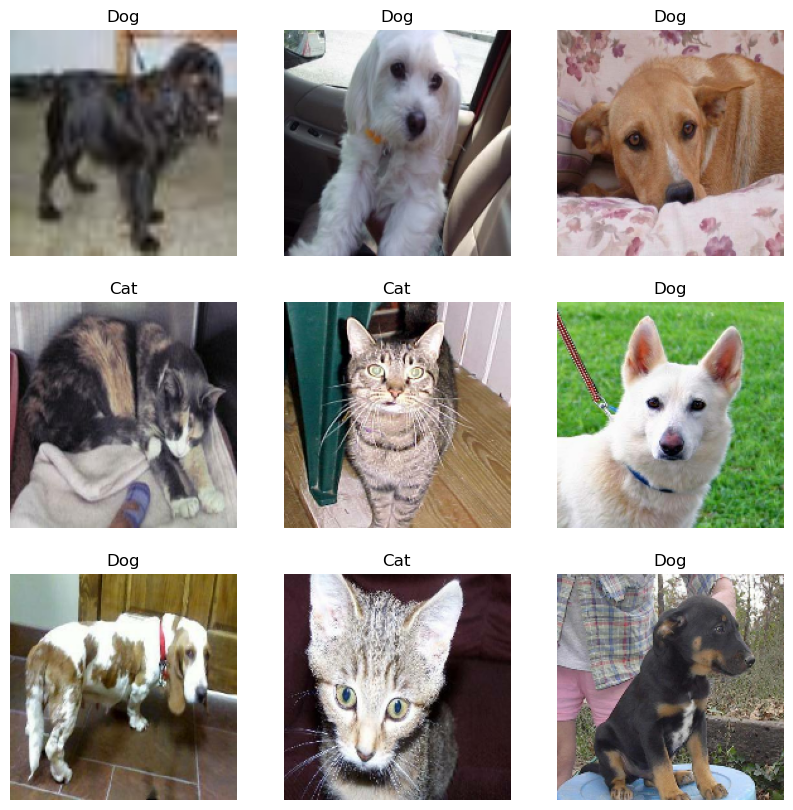

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  # Take one batch
    for i in range(9):  # Show first 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("Cat" if labels[i] == 0 else "Dog")
        plt.axis("off")
plt.show()


## 🤖 Define the CNN Model

In [5]:
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),  # Normalize pixel values
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")  # Binary classification
])


### Compile the Model

In [6]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


### 🏋️ Train the Model 

In [7]:
epochs = 10  # Adjust as needed

history = model.fit(
    train_ds,
    validation_data=val_ds,  # Use validation set
    epochs=epochs
)


Epoch 1/10
200/200 [==============================] - 64s 316ms/step - loss: 0.7039 - accuracy: 0.5325 - val_loss: 0.6512 - val_accuracy: 0.6475
Epoch 2/10
200/200 [==============================] - 62s 310ms/step - loss: 0.6399 - accuracy: 0.6348 - val_loss: 0.6010 - val_accuracy: 0.6869
Epoch 3/10
200/200 [==============================] - 62s 312ms/step - loss: 0.5757 - accuracy: 0.7014 - val_loss: 0.6098 - val_accuracy: 0.6631
Epoch 4/10
200/200 [==============================] - 62s 310ms/step - loss: 0.5024 - accuracy: 0.7523 - val_loss: 0.5316 - val_accuracy: 0.7531
Epoch 5/10
200/200 [==============================] - 62s 310ms/step - loss: 0.4330 - accuracy: 0.7956 - val_loss: 0.5509 - val_accuracy: 0.7581
Epoch 6/10
200/200 [==============================] - 62s 311ms/step - loss: 0.3508 - accuracy: 0.8462 - val_loss: 0.5435 - val_accuracy: 0.7656
Epoch 7/10
200/200 [==============================] - 62s 309ms/step - loss: 0.2624 - accuracy: 0.8902 - val_loss: 0.6525 - val_ac

## Evaluate Test Set After Training

In [8]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")


63/63 [==============================] - 5s 83ms/step - loss: 1.0265 - accuracy: 0.7250
Test Accuracy: 0.7250


# 🧙‍♂️ Some Example Predictions From Our Test Data...

1/1 [==============================] - 0s 316ms/step


C:\Users\dr85r\AppData\Local\Temp\ipykernel_19896\3826963041.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = class_names[int(predictions[i] > 0.5)]  # ✅ Converts sigmoid output to class
C:\Users\dr85r\miniconda3\envs\tn_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dr85r\miniconda3\envs\tn_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


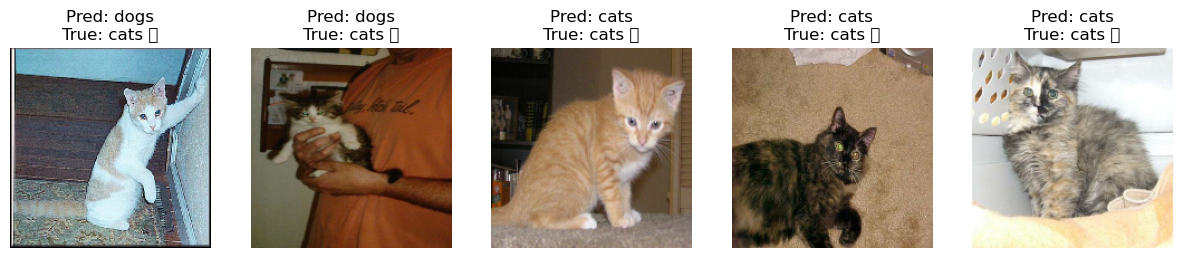

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def display_predictions(model, dataset, class_names, num_images=5):
    # ✅ Take one batch from the test dataset
    images, labels = next(iter(dataset.take(1)))

    # ✅ Get predictions
    predictions = model.predict(images)

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        img = images[i].numpy().astype("uint8")  # ✅ Convert tensor to NumPy array

        # ✅ Convert label tensor to an integer
        true_label = class_names[int(labels[i].numpy())]  
        predicted_label = class_names[int(predictions[i] > 0.5)]  # ✅ Converts sigmoid output to class

        # ✅ Check if prediction is correct
        correct = "✅" if true_label == predicted_label else "❌"

        # ✅ Display the image
        plt.imshow(img)
        plt.title(f"Pred: {predicted_label}\nTrue: {true_label} {correct}")
        plt.axis("off")

    plt.show()

# ✅ Call the function with the correct parameters
display_predictions(model, test_ds, class_names)
